In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv("../dataset/Mall_Customers.csv")

In [16]:
data.head()
data.dtypes
df = data.drop(['Gender'], axis = 1)

In [17]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(16.819444444444443, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

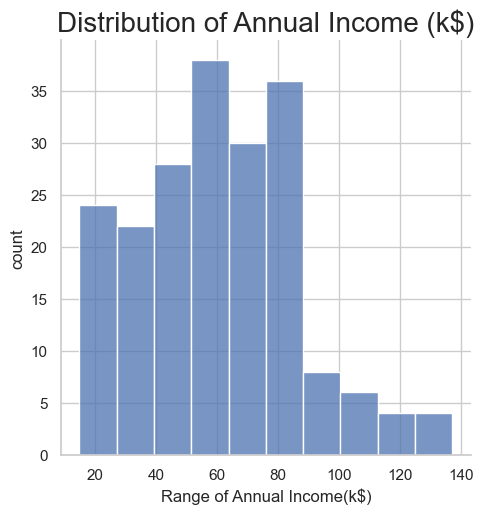

In [19]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income(k$)')
plt.ylabel('count')

Text(16.819444444444443, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

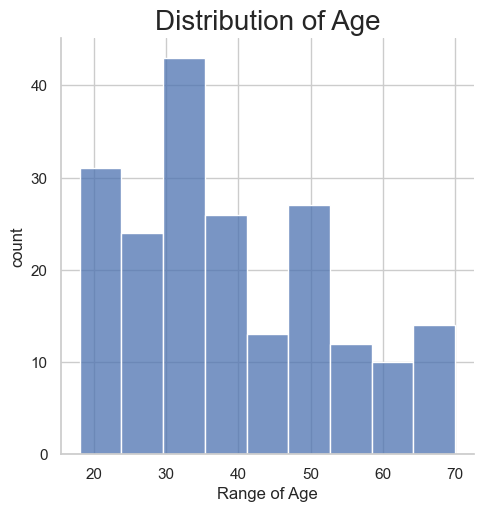

In [21]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.displot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('count')

In [27]:
df1= data[["CustomerID","Gender","Age", "Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


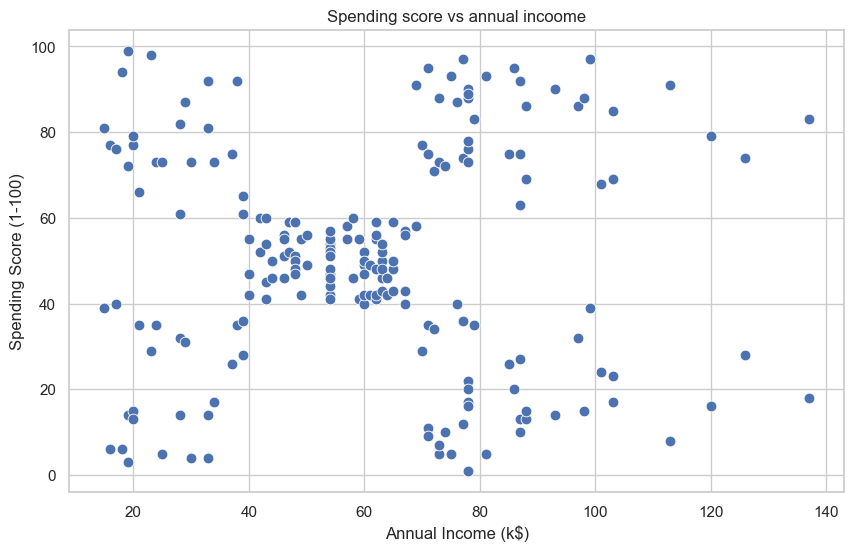

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data =X ,s =60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Spending score vs annual incoome" )
plt.show()

In [39]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km =KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

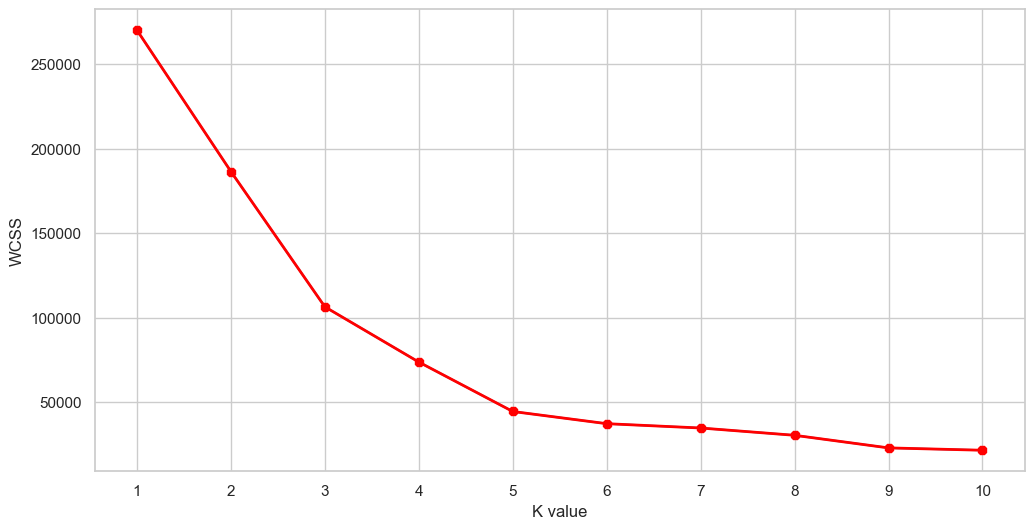

In [40]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2, color="red", marker="8")
plt.xlabel("K value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [41]:
#taking 5 clusters
km1 = KMeans(n_clusters=5)
#fitting the data
km1.fit(X)
#predicting the labels of the data
y = km1.predict(X)
#adding the labels sto a column named label
df1["label"]=y
#the new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


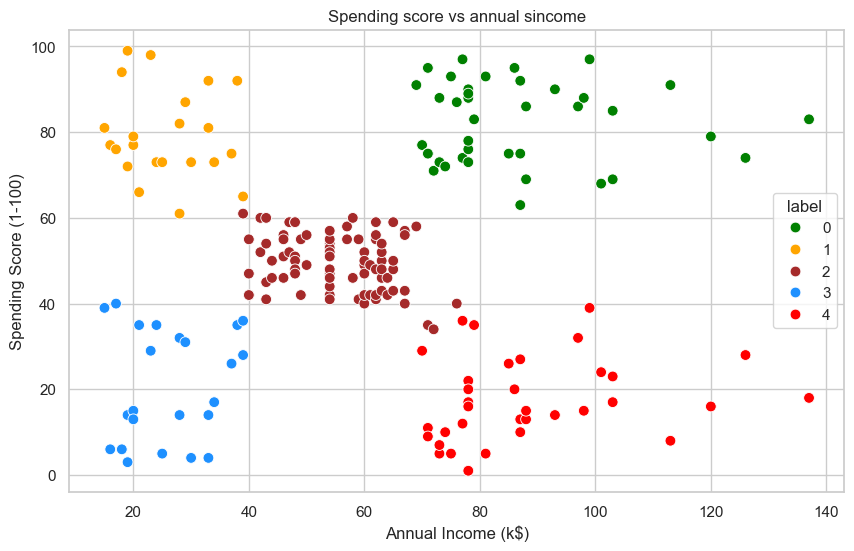

In [43]:
#scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",palette=['green','orange','brown','dodgerblue','red'],legend = 'full',data = df1,s=60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Spending score vs annual sincome")
plt.show()